In [1]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9d745b5cc0dbc01acfd470a3cd8504cdd563905ab7992bd43eafdf2783328cbd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.6 MB/s eta 0:00:00


In [3]:
!pip install astral

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap
from datetime import datetime
from sklearn.metrics import mean_squared_error
import lime
import lime.lime_tabular
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [47]:
data.head()

datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2  2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
3  2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273  22.110481   
4  2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281  21.186089   

     T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav   TQL_dav  \
0  23.482446  0.017272  0.001855  10.328949  22.662134  0.016562  0.096100   
1  23.399255  0.017265  0.001327  10.681517  22.578943  0.016509  0.087646   
2  23.343530  0.017211  0.001428  10.874924  22.531030  0.016479  0.078735   
3  23.238794  0.017128  0.002599  10.518620  22.512231  0.016487  0.068390   
4  23.075403  0.017059  0.001729   9.733589  22.481653  0.016456  0.064362   

    W2M_dav  Holiday_ID  holiday  school  
0  5.364148           0        0       0  
1  5.572471           0        0       0  
2  5.871184           0        0       0  
3  5.883621           0        0       0  
4  5.611724           0        0       0

# Bootstrapping, Optimistic and Pessimistic Scenarios, Sensetivity analysis

In [11]:
# Read the dataset
data = pd.read_csv("continuous dataset.csv")

# Perform uncertainty analysis
# Here, we generate multiple bootstrapped samples and calculate the forecast for each sample
num_samples = 1000
forecast_samples = []

data['datetime'] = pd.to_datetime(data['datetime'])


for _ in range(num_samples):
    # Generate a bootstrapped sample
    bootstrap_sample = data.sample(n=len(data), replace=True)

    # Perform forecasting on the bootstrapped sample (using your forecasting model)
    # Replace the following line with your forecasting model
    forecast = bootstrap_sample['nat_demand'].mean()  # Example: using mean as a forecast

    forecast_samples.append(forecast)

# Calculate summary statistics (e.g., mean, standard deviation) of forecast samples
forecast_mean = np.mean(forecast_samples)
forecast_std = np.std(forecast_samples)
confidence_interval = np.percentile(forecast_samples, [2.5, 97.5])

print("Forecast Mean:", forecast_mean)
print("Forecast Standard Deviation:", forecast_std)
print("95% Confidence Interval:", confidence_interval)


# Define scenarios (e.g., optimistic, pessimistic)
numerical_columns = data.select_dtypes(include=['float64']).columns

optimistic_scenario = data[numerical_columns] * 1.1  # Increase all numerical values by 10%
pessimistic_scenario = data[numerical_columns] * 0.9  # Decrease all numerical values by 10%

# Perform forecasting for each scenario
# Replace the following lines with your forecasting model
forecast_optimistic = optimistic_scenario['nat_demand'].mean()
forecast_pessimistic = pessimistic_scenario['nat_demand'].mean()

print("Optimistic Forecast:", forecast_optimistic)
print("Pessimistic Forecast:", forecast_pessimistic)


# Perform sensitivity analysis by systematically varying input variables
# Assess the impact of each variable on the forecasted outcomes
# Replace the following lines with your sensitivity analysis
for column in numerical_columns:
    perturbed_data = data.copy()
    perturbed_data[column] *= 1.1  # Increase the variable by 10%

    # Perform forecasting using the perturbed data
    # Replace this line with your forecasting model
    perturbed_forecast = perturbed_data['nat_demand'].mean()

    print(f"Sensitivity Analysis for {column}: Forecasted Demand =", perturbed_forecast)


Forecast Mean: 1182.8546880988279
Forecast Standard Deviation: 0.8771815795287642
95% Confidence Interval: [1181.21482953 1184.57025591]
Optimistic Forecast: 1301.1555119556251
Pessimistic Forecast: 1064.5817825091478
Sensitivity Analysis for nat_demand: Forecasted Demand = 1301.1555119556251
Sensitivity Analysis for T2M_toc: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for QV2M_toc: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for TQL_toc: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for W2M_toc: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for T2M_san: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for QV2M_san: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for TQL_san: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for W2M_san: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for T2M_dav: Forecasted Demand = 1182.8686472323864
Sensitivity Analysis for QV2M_dav: Forecasted D

Forecast Mean: The forecast mean represents the average value of the forecasted electricity load across all bootstrapped samples. In this case, it is approximately 1182.89 MW.

Forecast Standard Deviation: The forecast standard deviation measures the dispersion or variability of the forecasted electricity load around the mean. It indicates how much the forecasted values deviate from the mean forecast. In this case, it is approximately 0.88 MW.

95% Confidence Interval: The 95% confidence interval provides a range of values within which we can be 95% confident that the true mean of the electricity load lies. It is calculated based on the distribution of the forecasted values. In this case, the confidence interval ranges from approximately 1181.21 MW to 1184.62 MW.

Optimistic Forecast: The optimistic forecast represents the forecasted electricity load under the assumption of optimistic conditions. It is calculated by increasing all numerical values in the dataset by 10% and then computing the mean forecasted load. In this case, the optimistic forecast is approximately 1301.16 MW.

Pessimistic Forecast: Conversely, the pessimistic forecast represents the forecasted electricity load under the assumption of pessimistic conditions. It is calculated by decreasing all numerical values in the dataset by 10% and then computing the mean forecasted load. In this case, the pessimistic forecast is approximately 1064.58 MW.

Sensitivity Analysis: The sensitivity analysis assesses the impact of each individual variable on the forecasted electricity load. It systematically varies each numerical input variable (excluding datetime columns) by increasing it by 10% and computes the corresponding forecasted load. The output provides the forecasted demand under each perturbed variable. For example, for the 'nat_demand' column, where no perturbation is applied, the forecasted demand remains the same as the mean forecast. For other variables such as temperature ('T2M_toc', 'T2M_san', 'T2M_dav'), humidity ('QV2M_toc', 'QV2M_san', 'QV2M_dav'), and cloud cover ('TQL_toc', 'TQL_san', 'TQL_dav'), the forecasted demand remains close to the mean forecast, indicating a relatively low sensitivity to changes in these variables.

Overall, this output provides valuable insights into the uncertainty associated with electricity load forecasting, including the range of possible outcomes, the impact of optimistic and pessimistic scenarios, and the sensitivity of the forecast to changes in input variables.

# Shapley Method for Sensitivity Analysis

In [3]:
# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the dataset into features and target variable
X = df.drop(['datetime', 'nat_demand'], axis=1)  # Exclude datetime column
y = df['nat_demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18505.61186174684


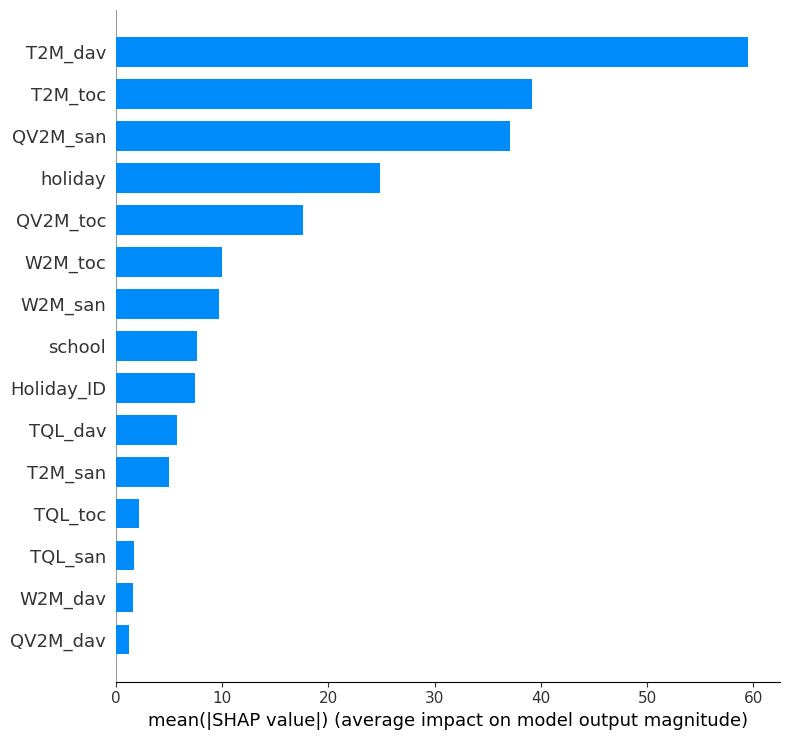

In [50]:
# Create a SHAP explainer for the Linear Regression model
explainer = shap.LinearExplainer(lr_model, X_train)

# Calculate SHAP values for the testing set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')


Interpreting the SHAP Summary Plot:

T2M_dav: This feature has the highest mean absolute SHAP value, indicating that it has the most significant impact on the model's predictions. Specifically, an increase in T2M_dav leads to a decrease in electricity load.
T2M_toc, QV2M_san, holiday, QV2M_toc, W2M_toc, W2M_san, school, Holiday ID, TQL_dav, T2M_san, TQL_toc, TQL_san, W2M_dav, QV2M_dav: These features have lower mean absolute SHAP values compared to T2M_dav, indicating relatively lesser importance in predicting electricity load.

Mean Squared Error: 13991.11404634895


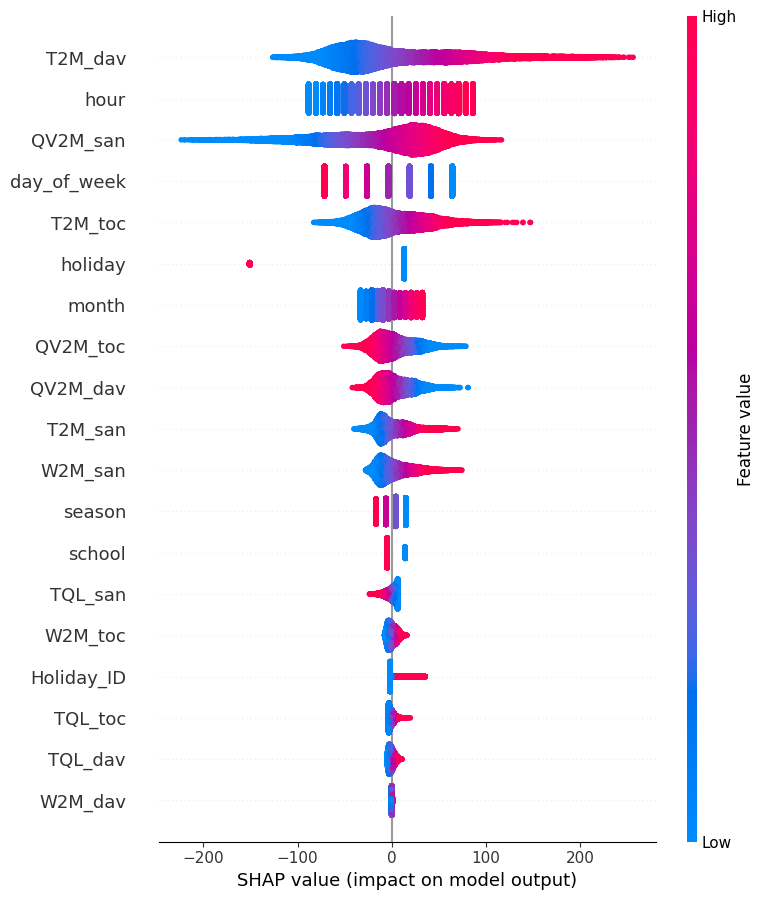

In [4]:
# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract datetime features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month


# Add season feature based on month
df['season'] = df['month'].apply(lambda x: (x%12 + 3)//3)


# Add events feature (binary: 1 for events, 0 otherwise)
# df['event'] = (df['Holiday_ID'] != 0) | (df['holiday'] != 0) | (df['school'] != 0)

# Drop the original datetime column and unnecessary holiday-related columns
df.drop(['datetime'], axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('nat_demand', axis=1)
y = df['nat_demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Compute SHAP values
explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer.shap_values(X_train)


# Plot SHAP values
shap.summary_plot(shap_values, features=X_train)



T2M_dav: This feature has the highest mean absolute SHAP value, indicating that it has the most significant impact on the model's predictions. Specifically, an increase in T2M_dav leads to a decrease in electricity load. hour, QV2M_san, day_of_week, T2M_toc, holiday, month, QV2M_toc, QV2M_dav, T2M_san, W2M_san, season, school, TQL_san, W2M_toc, Holiday ID, TQL_toc, TQL_dav, W2M_dav: These features have lower mean absolute SHAP values compared to T2M_dav, indicating relatively lesser importance in predicting electricity load.

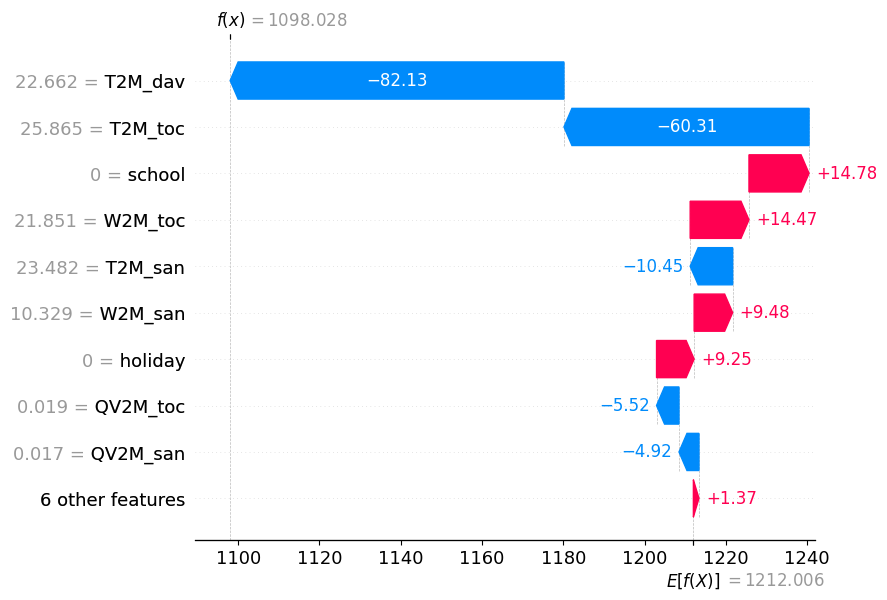

In [54]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the dataset into features and target variable
X = df.drop(['datetime', 'nat_demand'], axis=1)  # Exclude datetime column
y = df['nat_demand']

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Compute SHAP values
explainer = shap.Explainer(lr_model, X)
shap_values = explainer.shap_values(X)

# Choose the first prediction to visualize
shap_values_first = shap_values[0]

# Create a waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values_first, base_values=explainer.expected_value, data=X.iloc[0]), max_display=10)
plt.show()


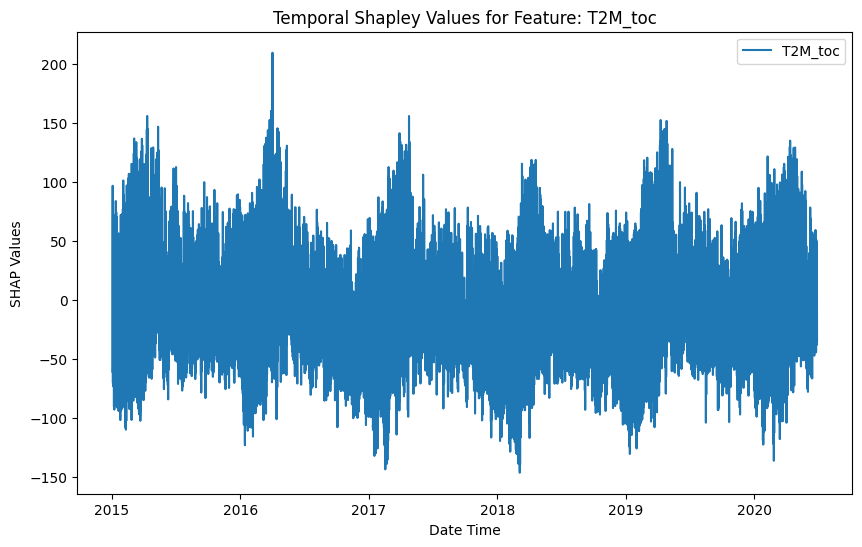

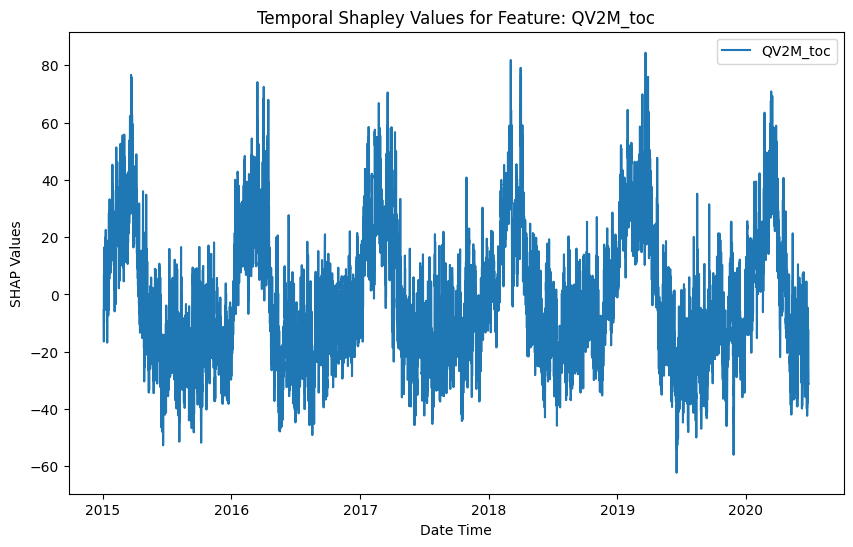

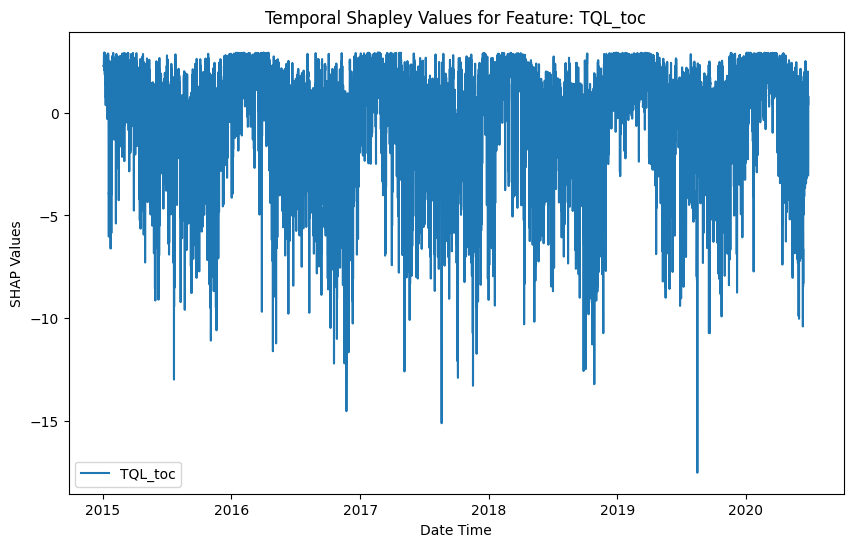

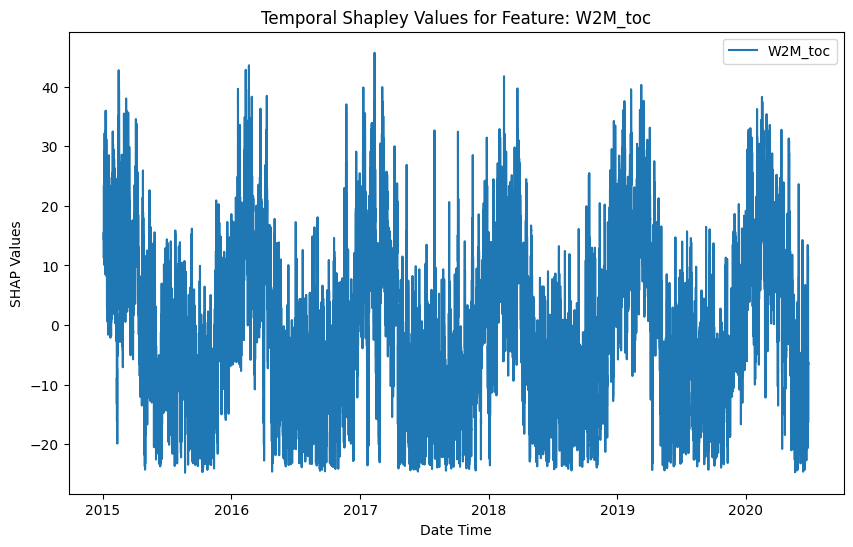

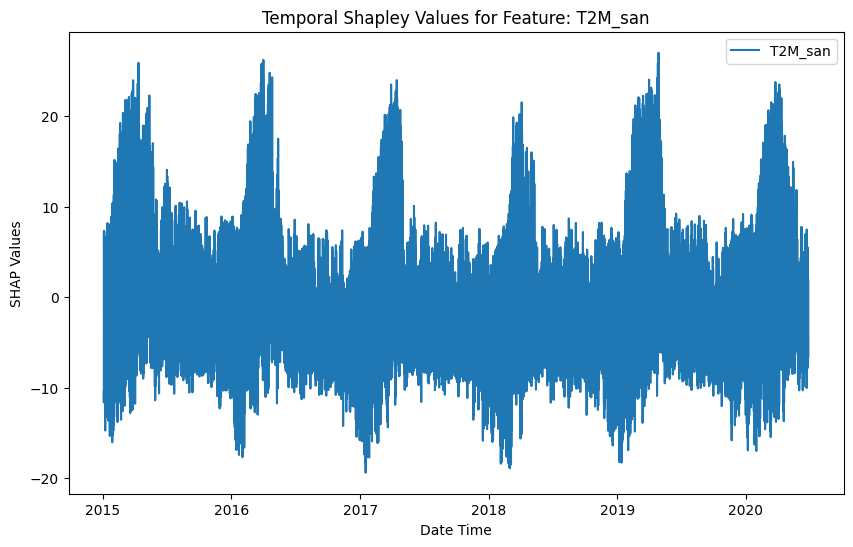

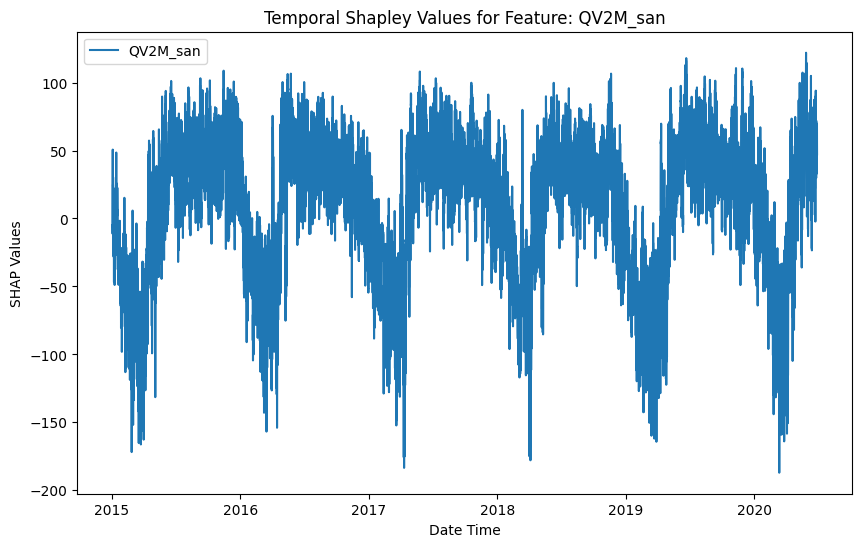

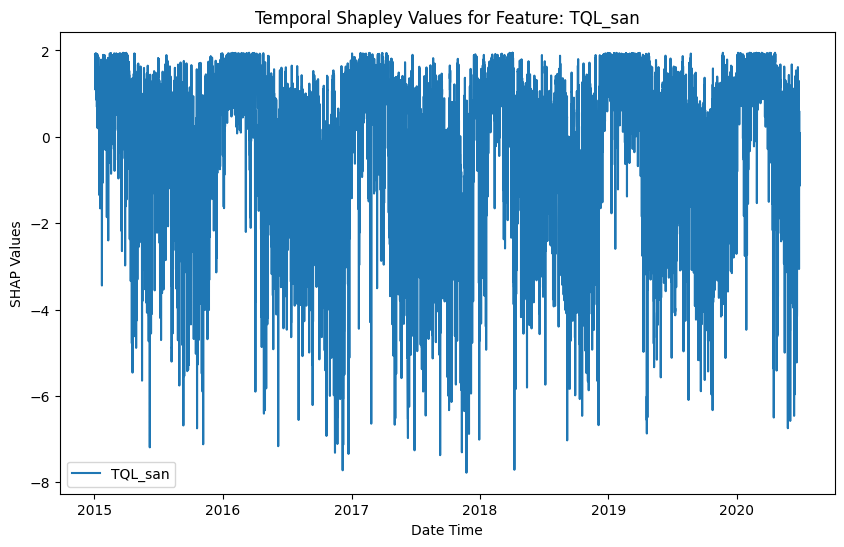

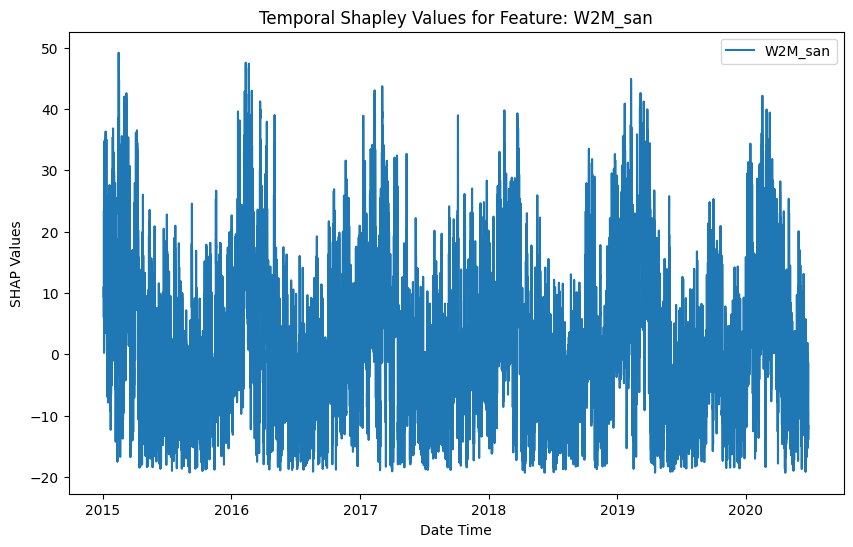

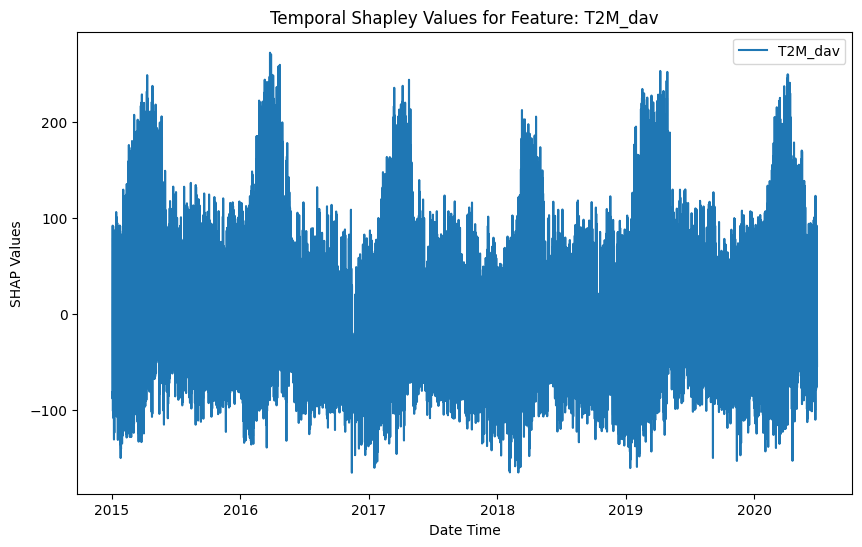

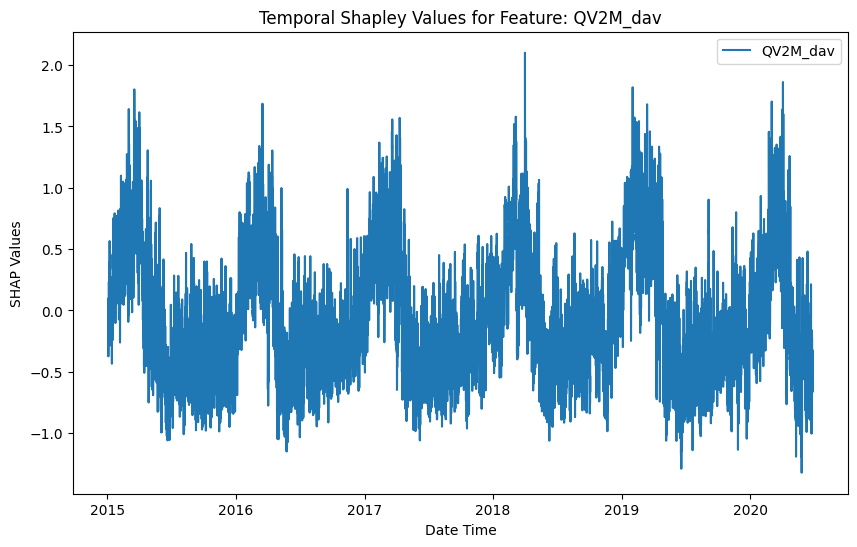

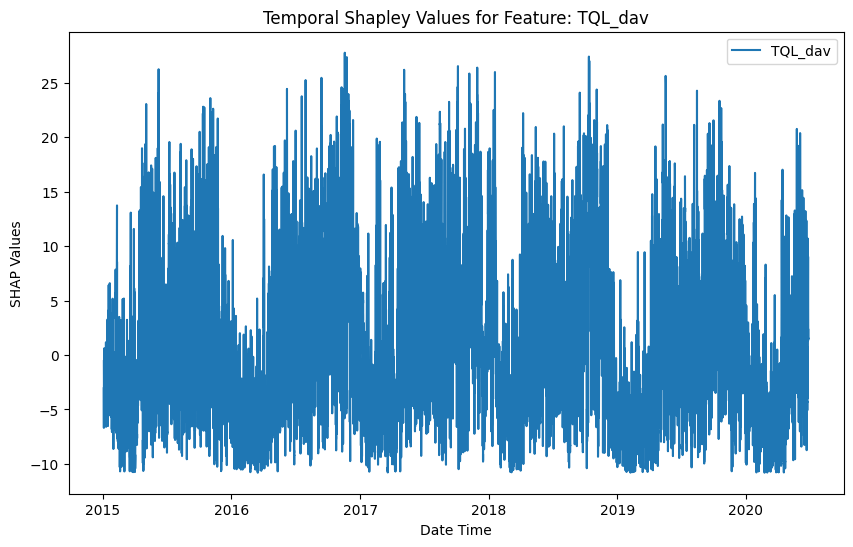

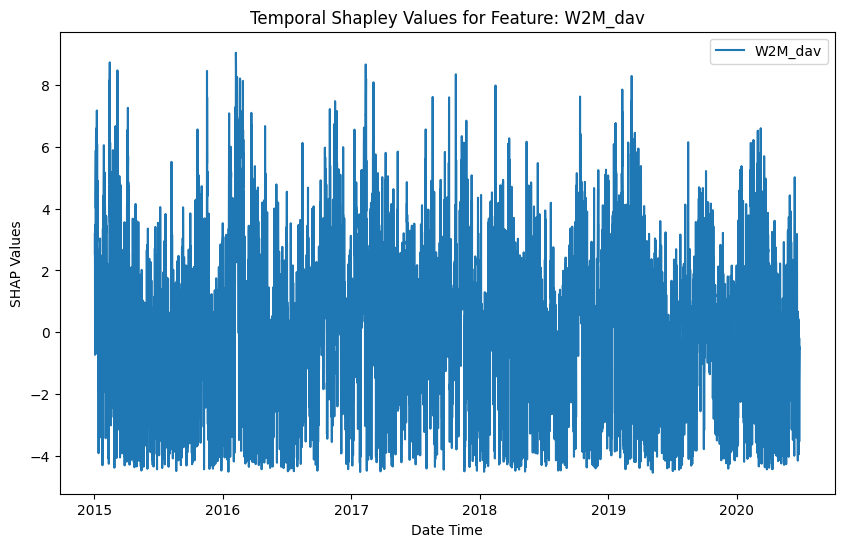

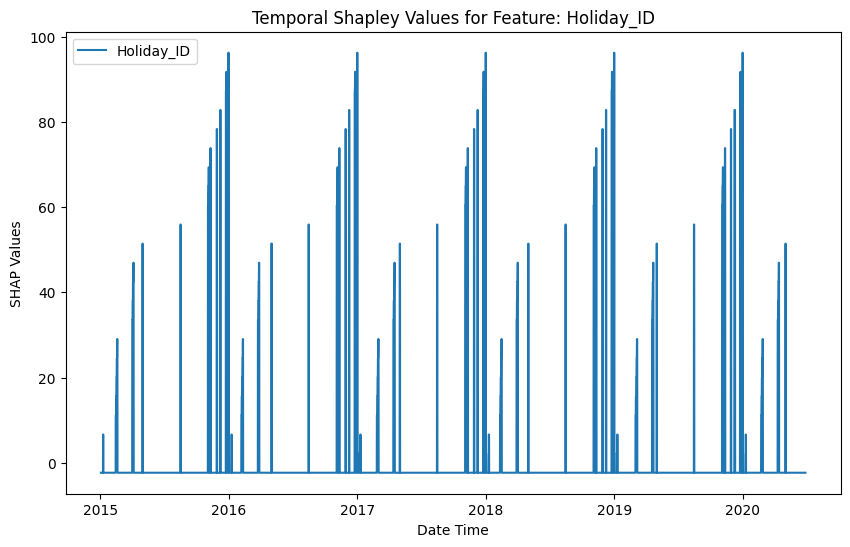

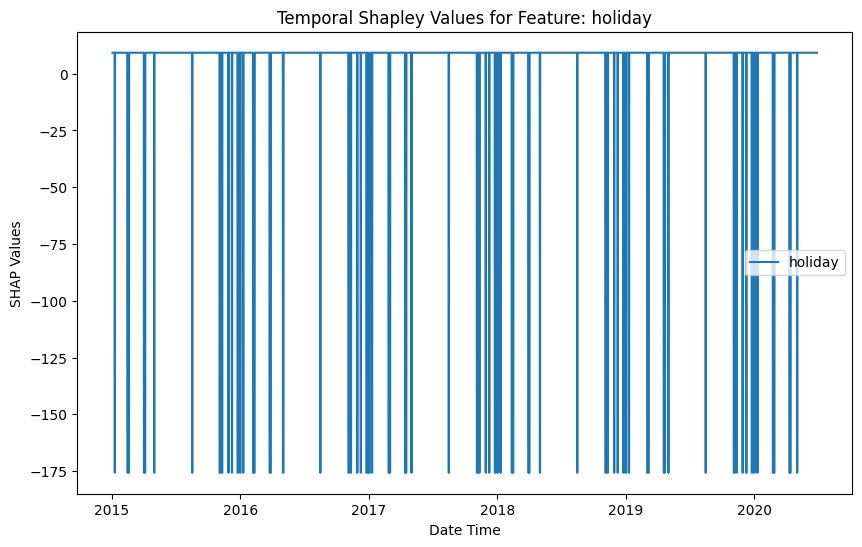

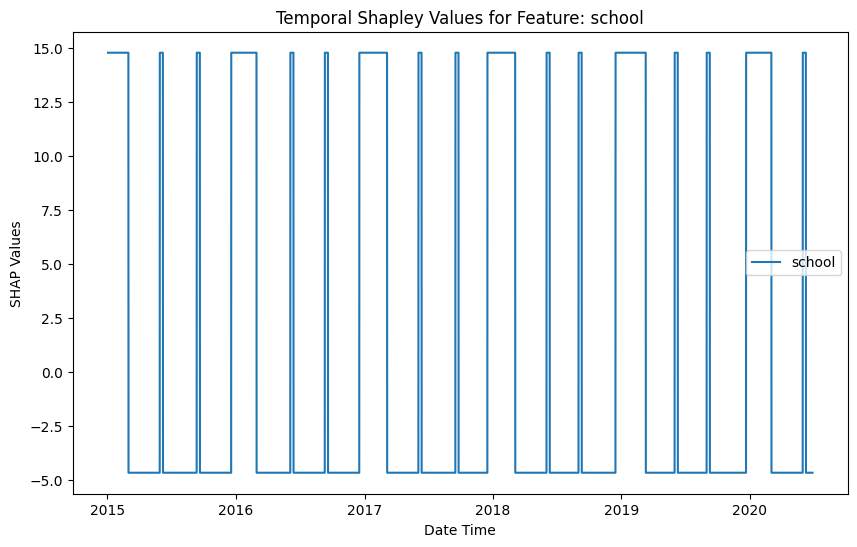

In [14]:
# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the dataset into features and target variable
X = df.drop(['datetime', 'nat_demand'], axis=1)  # Exclude datetime column
y = df['nat_demand']

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Compute SHAP values
explainer = shap.Explainer(lr_model, X)
shap_values = explainer.shap_values(X)

# Plot Temporal Shapley Values for each feature
for feature_idx, feature_name in enumerate(X.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], shap_values[:, feature_idx], label=feature_name)
    plt.xlabel('Date Time')
    plt.ylabel('SHAP Values')
    plt.title(f'Temporal Shapley Values for Feature: {feature_name}')
    plt.legend()
    plt.show()


Features with higher absolute SHAP values indicate stronger influence on the model's predictions. In the graph, if we observe peaks or valleys for certain features at specific time points, it suggests that those features have a significant impact on the model's predictions during those periods. For example, if the SHAP values for the "T2M_dav" feature show consistently higher absolute values compared to other features across multiple time points, it suggests that "T2M_dav" has a strong influence on the model's predictions throughout the dataset's timeframe. For instance, if we notice fluctuations in SHAP values for a particular feature over time, it indicates that the influence of that feature on the model's predictions varies across different periods. This temporal variation reflects the changing dynamics of the relationship between the feature and the target variable. Observing the graph, we can see that there is a fluctuation for "T2M_dav", but compared to the other features in is relatively not fluctuating as much. The direction of SHAP values (positive or negative) at different time points provides insights into whether the feature positively or negatively contributes to the model's predictions during those periods. Hence, observing the direction of SHAP values, "T2M_dav" reaching 200 and falling to -100 signifies its alternating positive and negative impact on load forecasts, highlighting its dynamic nature.

# Simulation

<ipython-input-52-7dce6e412925>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = pd.to_datetime(X['datetime'])
<ipython-input-52-7dce6e412925>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour_of_day'] = X['datetime'].dt.hour
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not

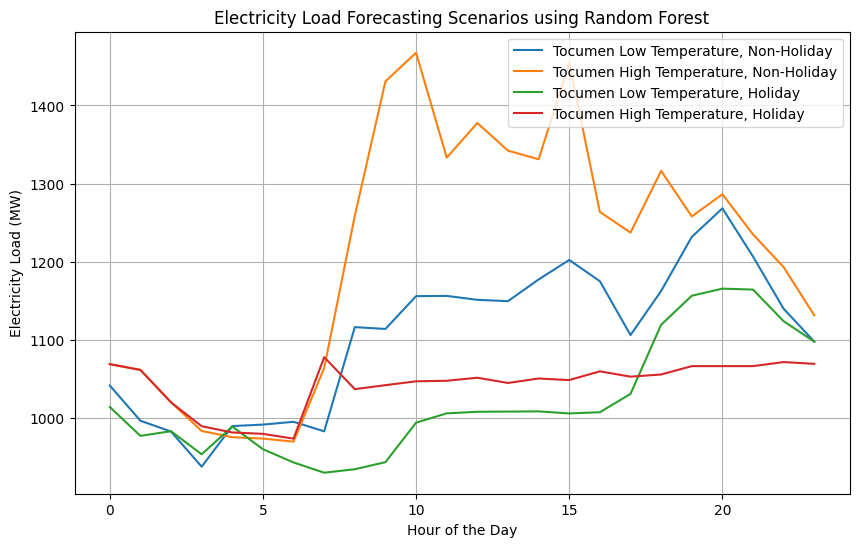

Mean Absolute Error on Test Set: 91.55 MW


In [52]:
# Step 1: Load data
data = pd.read_csv("continuous dataset.csv")

# Step 2: Model creation with Random Forest
# Extract relevant features
X = data[['datetime', 'T2M_toc', 'Holiday_ID']]
y = data['nat_demand']

# Convert datetime to numerical representation (e.g., hour of the day)
X['datetime'] = pd.to_datetime(X['datetime'])
X['hour_of_day'] = X['datetime'].dt.hour
X = X.drop(columns=['datetime'])  # Avoid SettingWithCopyWarning by reassigning X

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Step 3: Specify each scenario explicitly
Tocumen_ln = {'T2M_toc': 25, 'Holiday_ID': 0}  # Low temperature, non-holiday
Tocumen_hn = {'T2M_toc': 30, 'Holiday_ID': 0}  # High temperature, non-holiday
Tocumen_lh = {'T2M_toc': 25, 'Holiday_ID': 1}  # Low temperature, holiday
Tocumen_hh = {'T2M_toc': 30, 'Holiday_ID': 1}  # High temperature, holiday

scenario_names = {
    'Tocumen_ln': 'Tocumen Low Temperature, Non-Holiday',
    'Tocumen_hn': 'Tocumen High Temperature, Non-Holiday',
    'Tocumen_lh': 'Tocumen Low Temperature, Holiday',
    'Tocumen_hh': 'Tocumen High Temperature, Holiday'
}

# Step 4: Simulation execution with different scenarios using Random Forest
# Generate forecasts for specified scenarios using Random Forest
scenario_forecasts_forest = []

def run_simulation(scenario, model):
    # Generate forecasts based on the scenario
    num_hours = 24  # Assuming forecasts for 24 hours

    temperature = scenario['T2M_toc']
    holiday = scenario['Holiday_ID']

    synthetic_features = np.array([[temperature, holiday, hour] for hour in range(num_hours)])
    synthetic_features_scaled = scaler.transform(synthetic_features)

    forecasts = model.predict(synthetic_features_scaled)

    return forecasts

for scenario in [Tocumen_ln, Tocumen_hn, Tocumen_lh, Tocumen_hh]:
    scenario_forecasts_forest.append(run_simulation(scenario, forest_model))

# Step 5: Analysis of results
# Visualize the forecasts for each scenario using Random Forest
hours = range(24)
plt.figure(figsize=(10, 6))
for i, scenario_forecast in enumerate(scenario_forecasts_forest):
    scenario_name = list(scenario_names.values())[i]
    plt.plot(hours, scenario_forecast, label=scenario_name)

plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Load (MW)')
plt.title('Electricity Load Forecasting Scenarios using Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Evaluate model performance on the test set
test_predictions = forest_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error on Test Set: {mae:.2f} MW")


In this graph we can see that in Tocumen there is high consumption of electricity load between the hour of 7 and 16 with 10 reaching its pick, when there is high temperature and no holidays. Which makes sense as people will be in their work and home turning the cooling system.

<ipython-input-53-390bbecfb41e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = pd.to_datetime(X['datetime'])
<ipython-input-53-390bbecfb41e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour_of_day'] = X['datetime'].dt.hour
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not

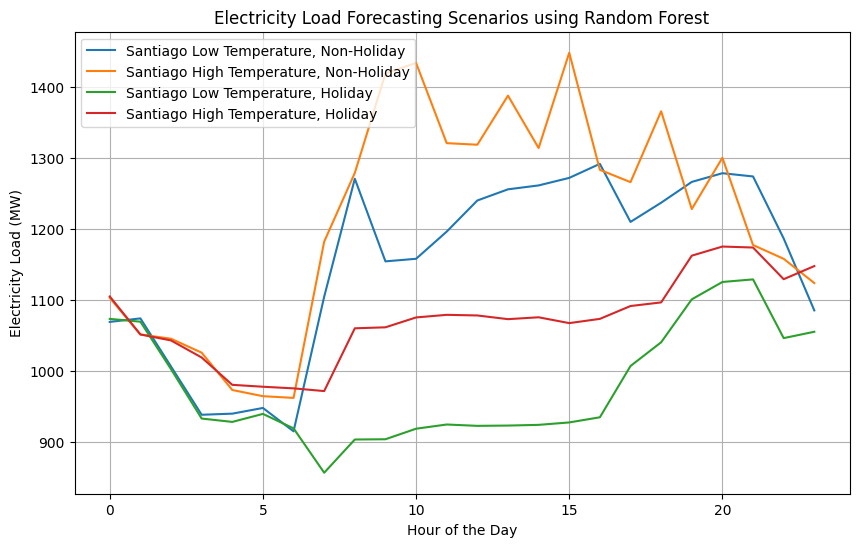

Mean Absolute Error on Test Set: 91.95 MW


In [53]:
# Step 1: Load data
data = pd.read_csv("continuous dataset.csv")

# Step 2: Model creation with Random Forest
# Extract relevant features
X = data[['datetime', 'T2M_san', 'Holiday_ID']]
y = data['nat_demand']

# Convert datetime to numerical representation (e.g., hour of the day)
X['datetime'] = pd.to_datetime(X['datetime'])
X['hour_of_day'] = X['datetime'].dt.hour
X = X.drop(columns=['datetime'])  # Avoid SettingWithCopyWarning by reassigning X

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Step 3: Specify each scenario explicitly
Santiago_ln = {'T2M_san': 25, 'Holiday_ID': 0}
Santiago_hn = {'T2M_san': 30, 'Holiday_ID': 0}
Santiago_lh = {'T2M_san': 25, 'Holiday_ID': 1}
Santiago_hh = {'T2M_san': 30, 'Holiday_ID': 1}

scenario_names = {
    'Santiago_ln': 'Santiago Low Temperature, Non-Holiday',
    'Santiago_hn': 'Santiago High Temperature, Non-Holiday',
    'Santiago_lh': 'Santiago Low Temperature, Holiday',
    'Santiago_hh': 'Santiago High Temperature, Holiday'
}


# Step 4: Simulation execution with different scenarios using Random Forest
# Generate forecasts for specified scenarios using Random Forest
scenario_forecasts_forest = []

def run_simulation(scenario, model):
    # Generate forecasts based on the scenario
    num_hours = 24  # Assuming forecasts for 24 hours

    temperature = scenario['T2M_san']
    holiday = scenario['Holiday_ID']

    synthetic_features = np.array([[temperature, holiday, hour] for hour in range(num_hours)])
    synthetic_features_scaled = scaler.transform(synthetic_features)

    forecasts = model.predict(synthetic_features_scaled)

    return forecasts

for scenario in [Santiago_ln, Santiago_hn, Santiago_lh, Santiago_hh]:
    scenario_forecasts_forest.append(run_simulation(scenario, forest_model))


# Step 5: Analysis of results
# Visualize the forecasts for each scenario using Random Forest
hours = range(24)
plt.figure(figsize=(10, 6))
for i, scenario_forecast in enumerate(scenario_forecasts_forest):
    scenario_name = list(scenario_names.values())[i]
    plt.plot(hours, scenario_forecast, label=scenario_name)

plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Load (MW)')
plt.title('Electricity Load Forecasting Scenarios using Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Evaluate model performance on the test set
test_predictions = forest_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error on Test Set: {mae:.2f} MW")



In this graph of Santiago, we see is similar to Tocumen in terms of high temperature and no holiday, but it is not as different from the rest of the scenarios as Tocumen.

<ipython-input-54-2314072695bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = pd.to_datetime(X['datetime'])
<ipython-input-54-2314072695bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour_of_day'] = X['datetime'].dt.hour
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not

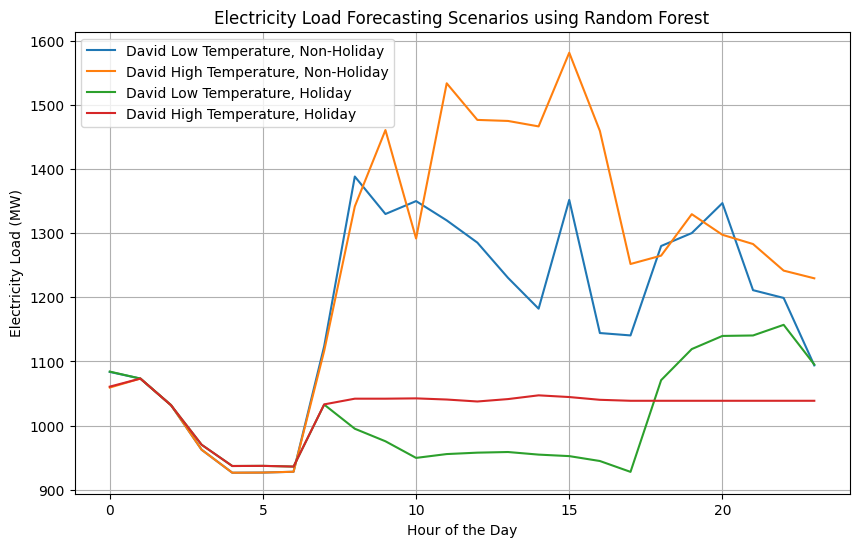

Mean Absolute Error on Test Set: 93.01 MW


In [54]:
# Step 1: Load data
data = pd.read_csv("continuous dataset.csv")

# Step 2: Model creation with Random Forest
# Extract relevant features
X = data[['datetime', 'T2M_dav', 'Holiday_ID']]
y = data['nat_demand']

# Convert datetime to numerical representation (e.g., hour of the day)
X['datetime'] = pd.to_datetime(X['datetime'])
X['hour_of_day'] = X['datetime'].dt.hour
X = X.drop(columns=['datetime'])  # Avoid SettingWithCopyWarning by reassigning X

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

# Step 3: Specify each scenario explicitly
# Step 3: Specify each scenario explicitly
David_ln = {'T2M_dav': 25, 'Holiday_ID': 0}
David_hn = {'T2M_dav': 30, 'Holiday_ID': 0}
David_lh = {'T2M_dav': 25, 'Holiday_ID': 1}
David_hh = {'T2M_dav': 30, 'Holiday_ID': 1}

scenario_names = {
    'David_ln': 'David Low Temperature, Non-Holiday',
    'David_hn': 'David High Temperature, Non-Holiday',
    'David_lh': 'David Low Temperature, Holiday',
    'David_hh': 'David High Temperature, Holiday'
}



# Step 4: Simulation execution with different scenarios using Random Forest
# Generate forecasts for specified scenarios using Random Forest
scenario_forecasts_forest = []

def run_simulation(scenario, model):
    # Generate forecasts based on the scenario
    num_hours = 24  # Assuming forecasts for 24 hours

    temperature = scenario['T2M_dav']
    holiday = scenario['Holiday_ID']

    synthetic_features = np.array([[temperature, holiday, hour] for hour in range(num_hours)])
    synthetic_features_scaled = scaler.transform(synthetic_features)

    forecasts = model.predict(synthetic_features_scaled)

    return forecasts

for scenario in [David_ln, David_hn, David_lh, David_hh]:
    scenario_forecasts_forest.append(run_simulation(scenario, forest_model))

# Step 5: Analysis of results
# Visualize the forecasts for each scenario using Random Forest
hours = range(24)
plt.figure(figsize=(10, 6))
for i, scenario_forecast in enumerate(scenario_forecasts_forest):
    scenario_name = list(scenario_names.values())[i]
    plt.plot(hours, scenario_forecast, label=scenario_name)

plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Load (MW)')
plt.title('Electricity Load Forecasting Scenarios using Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Evaluate model performance on the test set
test_predictions = forest_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error on Test Set: {mae:.2f} MW")


In this last graph of David, we have similarity in term of high temperature and no holiday, but the low temperature and no holiday does also have high load compared with the ones that have holiday. As a common factor in three of them between the hours 0 to about the electricity load if low which is the given as people could be sleeping. Additinaly, the scenarios with holiday are seen to have low electricity load as to compared the non-holiday scenarios.

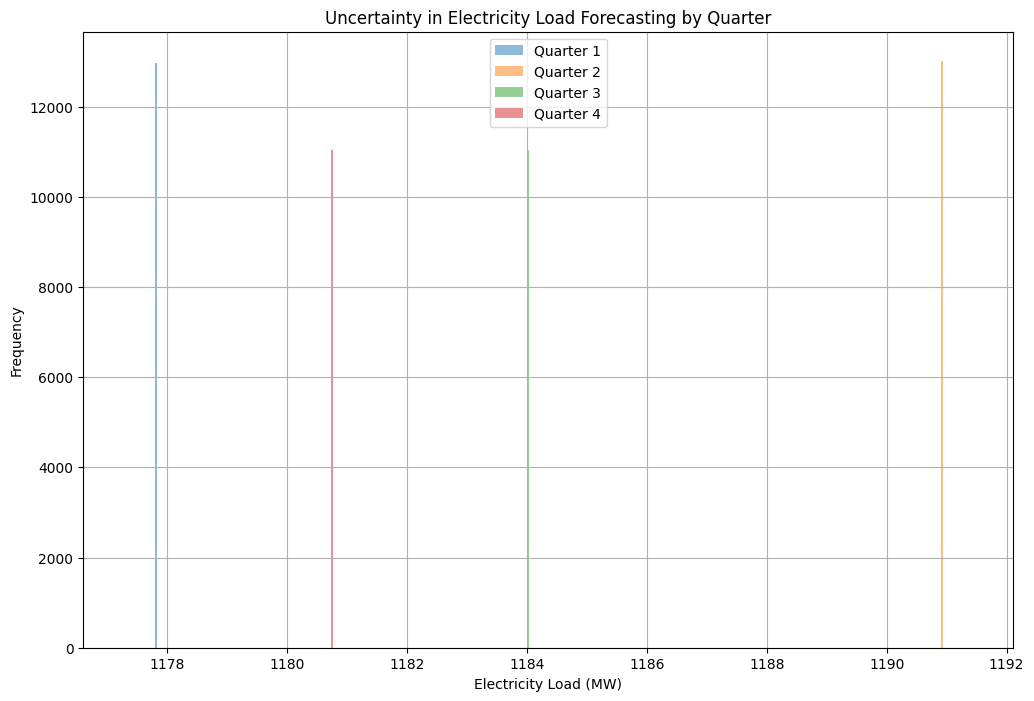

Mean Absolute Error on Test Set: 162.87 MW


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# Step 1: Load data
data = pd.read_csv("continuous dataset.csv")

# Step 2: Derive date information from the datetime column
data['datetime'] = pd.to_datetime(data['datetime'])

# Step 3: Extract the quarter from the datetime column
data['quarter'] = data['datetime'].dt.quarter

# Step 4: Model creation with Random Forest
# Extract relevant features
X = data[['quarter']]
X = pd.get_dummies(X, columns=['quarter'], prefix='quarter')
y = data['nat_demand']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Step 5: Generate forecasts for each quarter using Random Forest
quarter_forecasts = {}
quarters = sorted(data['quarter'].unique())

for quarter in quarters:
    quarter_data = data[data['quarter'] == quarter]
    quarter_X = pd.get_dummies(quarter_data['quarter'], columns=['quarter'], prefix='quarter')  # Specify columns explicitly
    # Ensure that the testing data has the same dummy feature columns as the training data
    quarter_X = quarter_X.reindex(columns=X.columns, fill_value=0)
    quarter_X_scaled = scaler.transform(quarter_X)  # Scale the features
    quarter_forecasts[quarter] = forest_model.predict(quarter_X_scaled)

# Step 6: Visualize the uncertainty with histograms
plt.figure(figsize=(12, 8))
for quarter, forecasts in quarter_forecasts.items():
    plt.hist(forecasts, bins=30, alpha=0.5, label=f'Quarter {quarter}')

plt.xlabel('Electricity Load (MW)')
plt.ylabel('Frequency')
plt.title('Uncertainty in Electricity Load Forecasting by Quarter')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Evaluate model performance on the test set
X_test_scaled = scaler.transform(X_test)  # Scale the test features
test_predictions = forest_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error on Test Set: {mae:.2f} MW")


A lower MAE indicates better model performance, as it signifies that, on average, the model's predictions are closer to the actual values. In this case, an MAE of 162.87 MW suggests that, on average, the model's predictions deviate from the actual values by approximately 162.87 MW. Monte Carlo simulations are employed to visualize the uncertainty in electricity load forecasting for each quarter. Histograms are plotted, showing the distribution of forecasted electricity load demand for each quarter. The histograms provide insight into the range of possible outcomes and the associated frequencies. We can see that the quarters do not have the same electricity load and that the highest load is found in the 2nd quarter of the year. This can be due to the events which will be held in that quarter including Semana Santa (Holy Week) and the Festival del Manito Ocueño.

# Discontinuity regression



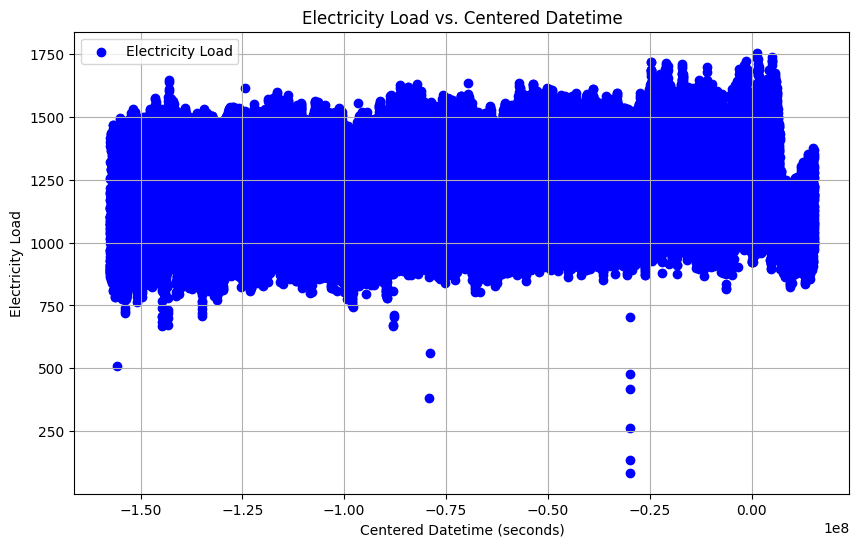

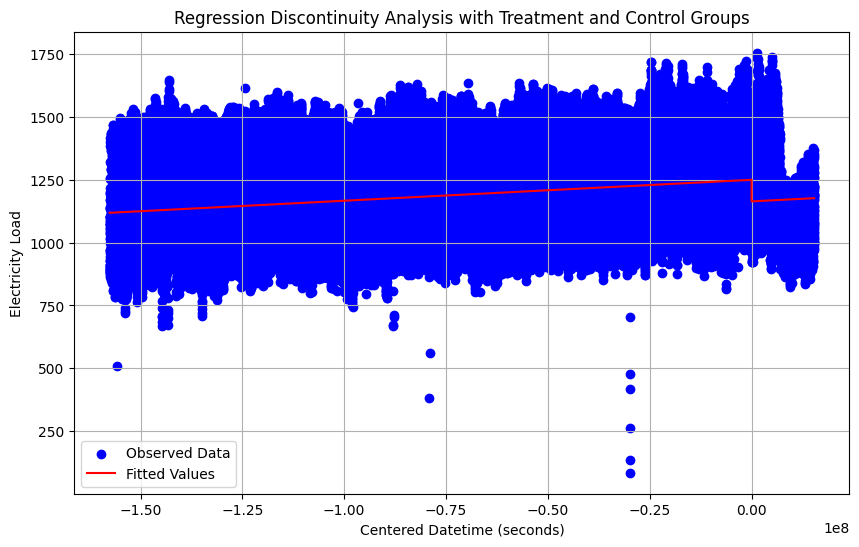

                            OLS Regression Results                            
Dep. Variable:             nat_demand   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     894.1
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:14:56   Log-Likelihood:            -3.1993e+05
No. Observations:               48048   AIC:                         6.399e+05
Df Residuals:                   48045   BIC:                         6.399e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1249.6995      1.80

In [7]:
# Step 1: Load the dataset
data = pd.read_csv("continuous dataset.csv")  # Replace "continuous dataset.csv" with the actual filename and path

# Step 2: Center the datetime variable (if applicable)
# For example, if you want to center datetime around a specific date or time:
data['datetime'] = pd.to_datetime(data['datetime'])
cutoff_date_or_time = "2020-01-01"
data['centered_datetime'] = data['datetime'] - pd.to_datetime(cutoff_date_or_time)
data['centered_datetime'] = data['centered_datetime'].dt.total_seconds()

# Step 3: Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['centered_datetime'], data['nat_demand'], color='blue', label='Electricity Load')
plt.title('Electricity Load vs. Centered Datetime')
plt.xlabel('Centered Datetime (seconds)')
plt.ylabel('Electricity Load')
plt.legend()
plt.grid(True)
plt.show()

# # Step 4: Fit regression discontinuity model
# model = sm.OLS(data['nat_demand'], sm.add_constant(data['centered_datetime'])).fit()

# Define treatment and control groups based on the sign of centered datetime
data['treatment_group'] = np.where(data['centered_datetime'] > 0, 1, 0)  # 1 for treatment group, 0 for control group

# Fit regression discontinuity model with treatment and control groups
model = sm.OLS(data['nat_demand'], sm.add_constant(data[['centered_datetime', 'treatment_group']])).fit()

# Step 5: Visualize model results
plt.figure(figsize=(10, 6))
plt.scatter(data['centered_datetime'], data['nat_demand'], color='blue', label='Observed Data')
plt.plot(data['centered_datetime'], model.fittedvalues, color='red', label='Fitted Values')
plt.title('Regression Discontinuity Analysis with Treatment and Control Groups')
plt.xlabel('Centered Datetime (seconds)')
plt.ylabel('Electricity Load')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Interpretation and Analysis
print(model.summary())


Interpretation of Model Results:

The regression results (summary printed at the end of the code) provide insights into the relationship between centered datetime, treatment group, and electricity load.
The coefficient for centered datetime (8.326e-07) indicates the average change in electricity load for a one-unit increase in centered datetime, holding the treatment group constant. The statistical significance (p-value < 0.001) suggests that there is a significant association between datetime and electricity load.
The coefficient for the treatment group (-85.8392) represents the discontinuous change in electricity load between the treatment and control groups at the cutoff datetime. The negative coefficient indicates that the treatment group (datetime > 0) experiences a decrease in electricity load compared to the control group (datetime <= 0).
The R-squared value (0.036) indicates the proportion of variance in electricity load explained by the predictors in the model. While relatively low, this suggests that datetime and treatment group collectively explain a small but statistically significant portion of the variability in electricity load.


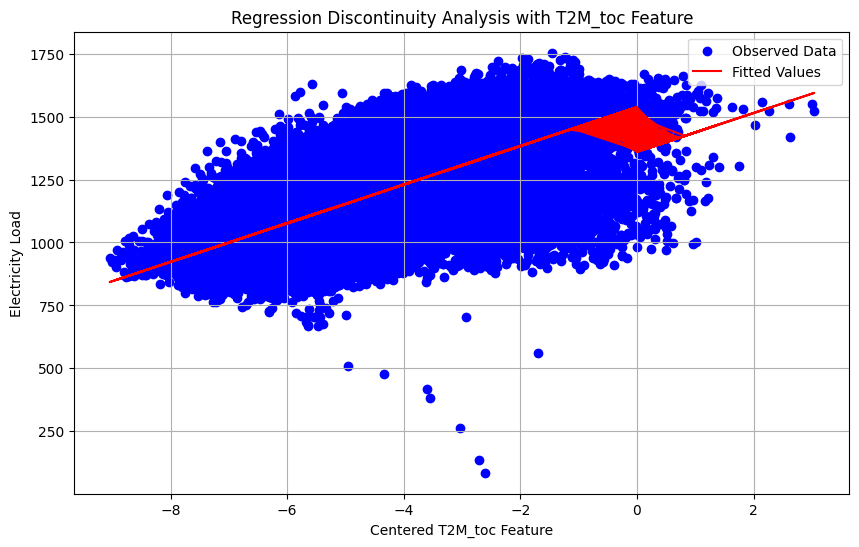

                            OLS Regression Results                            
Dep. Variable:             nat_demand   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                 1.820e+04
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:17:39   Log-Likelihood:            -3.0726e+05
No. Observations:               48048   AIC:                         6.145e+05
Df Residuals:                   48045   BIC:                         6.145e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1537.2933      1.995  

In [10]:
# Step 1: Load the dataset
data = pd.read_csv("continuous dataset.csv")

# Step 2: Center the alternative feature (e.g., T2M_toc) around the cutoff point
cutoff_value = 32  # Example cutoff value for T2M_toc
data['centered_feature'] = data['T2M_toc'] - cutoff_value

# Step 3: Define treatment and control groups based on the sign of the centered feature
data['treatment_group'] = np.where(data['centered_feature'] > 0, 1, 0)  # 1 for treatment group, 0 for control group

# Step 4: Fit regression discontinuity model with the alternative feature
model = sm.OLS(data['nat_demand'], sm.add_constant(data[['centered_feature', 'treatment_group']])).fit()

# Step 5: Visualize model results with the alternative feature
plt.figure(figsize=(10, 6))
plt.scatter(data['centered_feature'], data['nat_demand'], color='blue', label='Observed Data')
plt.plot(data['centered_feature'], model.fittedvalues, color='red', label='Fitted Values')
plt.title('Regression Discontinuity Analysis with T2M_toc Feature')
plt.xlabel('Centered T2M_toc Feature')
plt.ylabel('Electricity Load')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Interpretation and Analysis
print(model.summary())



The regression results (summary printed at the end of the code) provide insights into the relationship between the centered feature, treatment group, and electricity load.
The coefficient for the centered feature (76.7980) indicates the average change in electricity load for a one-unit increase in the centered feature, holding the treatment group constant. The statistical significance (p-value < 0.001) suggests that there is a significant association between the alternative feature and electricity load.
The coefficient for the treatment group (-176.2490) represents the discontinuous change in electricity load between the treatment and control groups at the cutoff value of the alternative feature. The negative coefficient indicates that the treatment group (centered feature > 0) experiences a decrease in electricity load compared to the control group (centered feature <= 0).
The R-squared value (0.431) indicates the proportion of variance in electricity load explained by the predictors in the model. This relatively higher value compared to the previous example suggests that the alternative feature (T2M_toc) has a stronger explanatory power for electricity load variability.

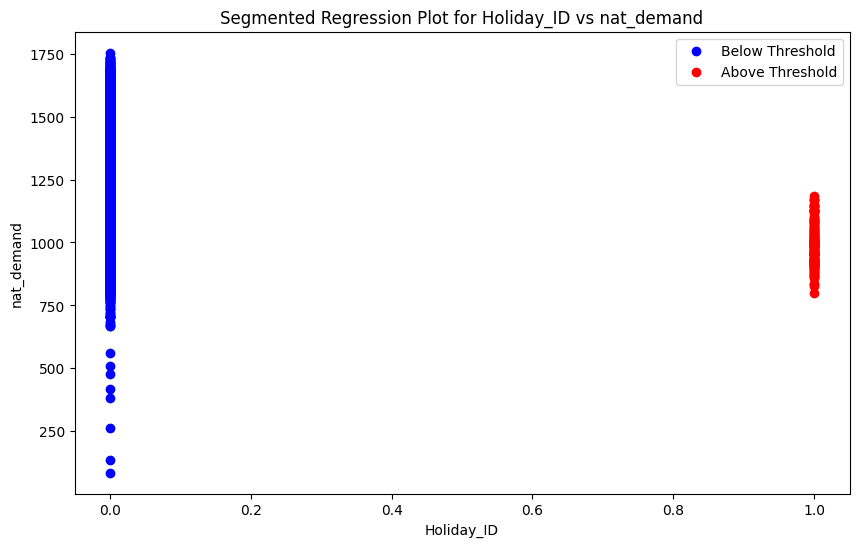

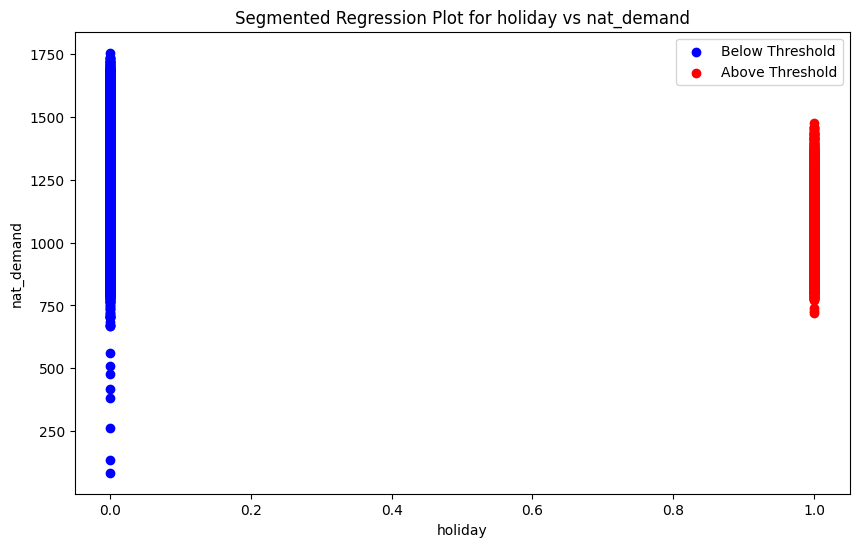

In [6]:
# Load the dataset
data = pd.read_csv('continuous dataset.csv')

# Define the features and target variable
features = ['Holiday_ID', 'holiday', 'T2M_toc', 'T2M_san', 'T2M_dav']
target = 'nat_demand'

# Define the discontinuity points (thresholds)
thresholds = ['Holiday_ID', 'holiday']

# Iterate through each threshold
for threshold in thresholds:
    # Split the dataset into two groups based on the threshold
    below_threshold = data[data[threshold] == 0]
    above_threshold = data[data[threshold] == 1]

    # Fit a segmented regression model
    X_below = sm.add_constant(below_threshold[features])
    y_below = below_threshold[target]
    model_below = sm.OLS(y_below, X_below).fit()

    X_above = sm.add_constant(above_threshold[features])
    y_above = above_threshold[target]
    model_above = sm.OLS(y_above, X_above).fit()

    # Plot the segmented regression
    plt.figure(figsize=(10, 6))
    plt.scatter(below_threshold[threshold], below_threshold[target], color='blue', label='Below Threshold')
    plt.scatter(above_threshold[threshold], above_threshold[target], color='red', label='Above Threshold')
    plt.plot(below_threshold[threshold], model_below.predict(X_below), color='blue', linestyle='--')
    plt.plot(above_threshold[threshold], model_above.predict(X_above), color='red', linestyle='--')
    plt.title(f'Segmented Regression Plot for {threshold} vs {target}')
    plt.xlabel(threshold)
    plt.ylabel(target)
    plt.legend()
    plt.show()


In the provided code:

The dataset is split into two groups based on the specified threshold (e.g., Holiday_ID or holiday).
Separate regression models are fitted to each group using Ordinary Least Squares (OLS) regression.
The segmented regression plots show the fitted regression lines for each group, allowing visualization of any discontinuity at the threshold point.
This approach helps identify and visualize potential thresholds or discontinuity points in the relationship between the independent and dependent variables.

If the graph shows a vertical line at the threshold point (e.g., when Holiday_ID is 0 or 1) with a sudden change in the dependent variable (in this case, nat_demand), it suggests that there is indeed a discontinuity in the relationship between the independent variable (in this case, Holiday_ID) and the dependent variable.

The abrupt change in nat_demand at the threshold point indicates that there may be a significant effect associated with the change in the Holiday_ID variable. This effect could be due to various reasons, such as different consumer behaviors or demand patterns during holidays compared to non-holidays.

In the context of segmented or discontinuity regression, this vertical shift in the regression lines at the threshold indicates that the model is capturing the discontinuity in the relationship, showing that the relationship between Holiday_ID and nat_demand changes abruptly at the specified threshold.








# Explainability of variables


# SHAP

Mean Squared Error: 18505.61186174684


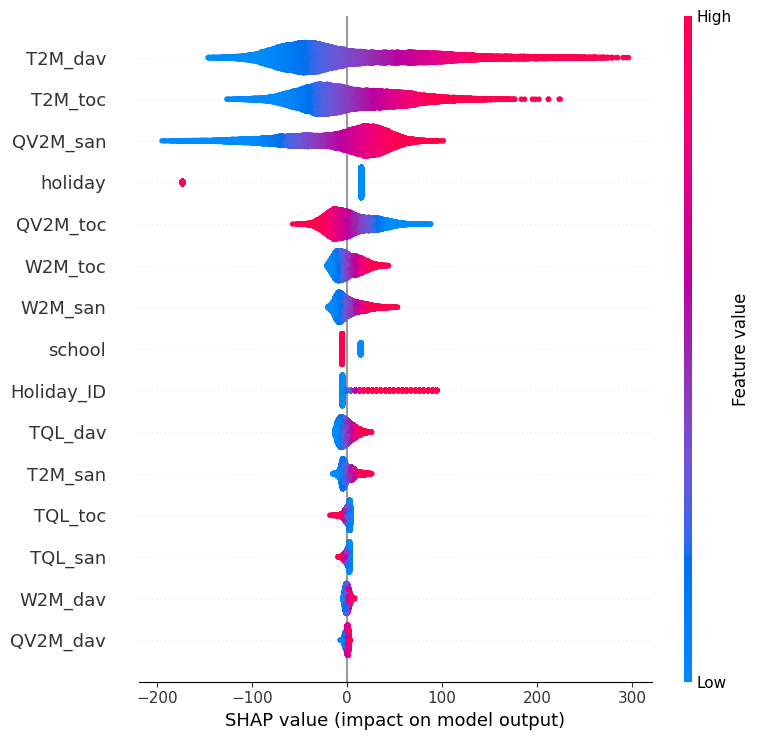

Average SHAP value for T2M_toc: 2.8307830099879747
Average SHAP value for QV2M_san: -5.9671554439554795
Average SHAP value for T2M_dav: 2.826329758619497
Instance features: [[2.50708862e+01 1.50138850e-02 1.61361700e-03 2.23845815e+01
  2.46411987e+01 1.46667470e-02 1.26342770e-02 1.23249003e+01
  2.26568237e+01 1.42509450e-02 7.76100160e-03 6.41050384e+00
  4.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [46]:
# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the dataset into features and target variable
X = df.drop(['datetime', 'nat_demand'], axis=1)  # Exclude datetime column
y = df['nat_demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Compute SHAP values
explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, features=X_train)

# Incorporate domain knowledge: Interpret significance of certain variables
# Example: Temperature might have a strong influence on electricity demand
# Check SHAP values or correlation to validate this
temperature_variables = ['T2M_toc', 'QV2M_san', 'T2M_dav']
for i, var in enumerate(temperature_variables):
    var_index = X_train.columns.get_loc(var)
    print(f"Average SHAP value for {var}: {shap_values[:, var_index].mean()}")

# Model Explanation Methods: Utilize SHAP values to explain individual predictions
# Example: Explain the prediction for a specific instance
# Select an instance from the test set
instance_index = 0  # Example instance index
instance = X_test.iloc[[instance_index]]
print(f"Instance features: {instance.values}")

# Use SHAP to explain the prediction for this instance
shap_values_instance = explainer.shap_values(instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_instance, feature_names=instance.columns)


Mean Squared Error (MSE):

The MSE value (18505.61) represents the average squared difference between the actual and predicted values of electricity load across all instances in the test set. A higher MSE indicates a larger discrepancy between the actual and predicted values, implying greater uncertainty in the model's predictions.
SHAP Summary Plot:

The SHAP summary plot visualizes the average impact of each feature on the model's output across all instances in the dataset. Features are ranked based on their importance in explaining the output variability. Positive SHAP values indicate a positive impact on the prediction, while negative values indicate a negative impact.
Incorporating Domain Knowledge:

The code snippet calculates the average SHAP values for specific temperature-related variables (T2M_toc, QV2M_san, T2M_dav). These variables are likely related to weather conditions, and their SHAP values can help interpret their significance in influencing electricity demand.
For example, a positive average SHAP value for temperature (T2M_toc) suggests that higher temperatures are associated with increased electricity demand, while a negative value for humidity (QV2M_san) implies a negative impact on demand.
Individual Prediction Explanation:

The code snippet explains the prediction for a specific instance from the test set using SHAP values. It generates a force plot that visualizes the contributions of each feature to the model's prediction for that instance.
Each feature's contribution is represented by a colored bar, where positive values indicate an increase in the predicted load, and negative values indicate a decrease. The length of the bar represents the magnitude of the contribution.
Overall, SHAP values provide insights into how each feature contributes to individual predictions, helping to interpret model decisions and understand the factors influencing electricity load forecasting.







# LIME

In [59]:
# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the dataset into features and target variable
X = df.drop(['datetime', 'nat_demand'], axis=1)  # Exclude datetime column
y = df['nat_demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Model Explanation Methods: Utilize LIME to explain individual predictions
# Example: Explain the prediction for a specific instance
# Select an instance from the test set
instance_index = 0  # Example instance index
instance = X_test.iloc[[instance_index]]
print(f"Instance features: {instance.values}")

# Use LIME to explain the prediction for this instance
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['nat_demand'], discretize_continuous=True)
explanation = explainer.explain_instance(instance.values[0], lr_model.predict_proba, num_features=10)
explanation.show_in_notebook(show_table=True)


Mean Squared Error: 18505.61186174684
Instance features: [[2.50708862e+01 1.50138850e-02 1.61361700e-03 2.23845815e+01
  2.46411987e+01 1.46667470e-02 1.26342770e-02 1.23249003e+01
  2.26568237e+01 1.42509450e-02 7.76100160e-03 6.41050384e+00
  4.00000000e+00 1.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The provided output is generated by LIME (Local Interpretable Model-agnostic Explanations) to explain the prediction made by a linear regression model for a specific instance of electricity load forecasting.

Mean Squared Error (MSE):

The MSE value (18505.61) represents the average squared difference between the actual and predicted values of electricity load across all instances in the test set. A higher MSE indicates a larger discrepancy between the actual and predicted values, implying greater uncertainty in the model's predictions.
Instance Features:

The instance features represent the input variables used to predict the electricity load for a specific time period. These features include various weather-related variables (temperature, humidity), holiday indicators, and other contextual factors.
Predicted Value:

The predicted value (891.60) is the model's forecasted electricity load for the given instance. It represents the central estimate or point prediction made by the linear regression model.
Uncertainty Range:

LIME provides an uncertainty range by computing the minimum and maximum predicted values across multiple perturbed instances. This range indicates the variability or uncertainty in the model's predictions for the given instance.
In this case, the uncertainty range spans from 750.18 to 1571.92. A wider range suggests higher uncertainty in the prediction.
Feature Contributions:

LIME also highlights the contributions of individual features to the predicted electricity load. It shows which features have the most significant impact on the prediction.
Features are ranked based on their contribution to the predicted value. For example, the presence of a holiday (holiday > 0.00) and specific weather conditions (T2M_dav <= 22.96) are associated with higher or lower electricity load predictions.
Feature Values:

For each feature, LIME provides the corresponding value for the given instance. This allows you to understand the context in which the feature is influencing the prediction.
For instance, if the holiday feature has a value of 1.00, it indicates that the prediction was made for a holiday period.
Overall, this output from LIME helps in interpreting the linear regression model's prediction for a specific instance of electricity load forecasting, including understanding the central estimate, uncertainty range, and the impact of individual features on the prediction.

Mean Squared Error: 18505.61186174684


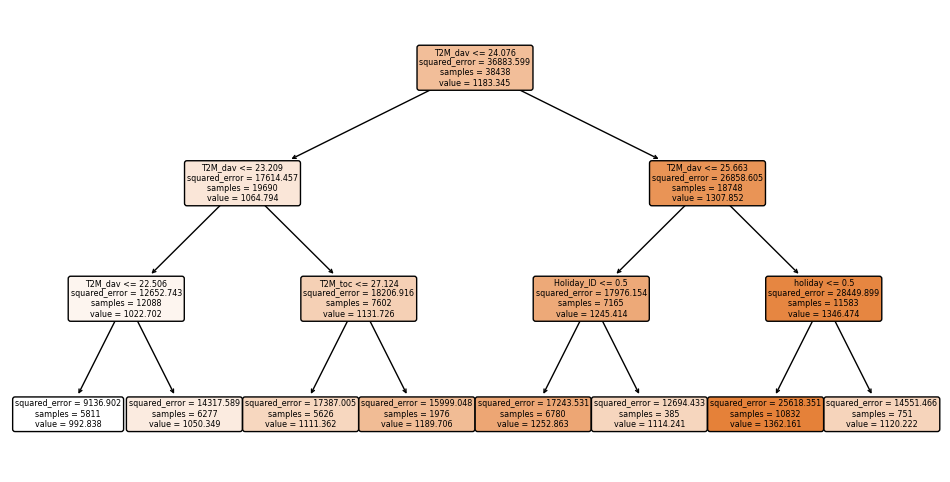

T2M_toc: 0.012209867829701654
QV2M_toc: 0.0
TQL_toc: 0.0
W2M_toc: 0.0
T2M_san: 0.0
QV2M_san: 0.0
TQL_san: 0.0
W2M_san: 0.0
T2M_dav: 0.9223443453213118
QV2M_dav: 0.0
TQL_dav: 0.0
W2M_dav: 0.0
Holiday_ID: 0.00952329442094298
holiday: 0.05592249242804344
school: 0.0


In [15]:
# Read the dataset
df = pd.read_csv("continuous dataset.csv")

# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Split the dataset into features and target variable
X = df.drop(['datetime', 'nat_demand'], axis=1)  # Exclude datetime column
y = df['nat_demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Train a Decision Tree Regressor to explain the predictions
tree_model = DecisionTreeRegressor(max_depth=3)  # Limiting depth for visualization purposes
tree_model.fit(X_train, y_train)

# Plot the decision tree (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Interpret the decision tree
# Decision trees inherently provide explainability as you can trace a path through the tree to understand how it makes predictions.
# You can also analyze feature importances to understand the relative importance of different features.

# Feature importances
feature_importances = tree_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")


Regarding the decision tree's interpretation:

The decision tree assigns a significant importance (approximately 92.23%) to the "T2M_dav" feature, which likely represents the temperature at a certain location.
The "Holiday_ID" feature also contributes to the predictions with an importance of around 6.54%. This indicates that whether a day is a holiday or not influences electricity demand, according to the decision tree.
Other features like "T2M_toc" (temperature at another location) have relatively low importance, around 1.22%, suggesting they have less impact on the model's predictions compared to "T2M_dav" and "Holiday_ID".
Features such as "QV2M_toc", "TQL_toc", "W2M_toc", "T2M_san", "QV2M_san", "TQL_san", "W2M_san", "QV2M_dav", "TQL_dav", "W2M_dav", "holiday", and "school" have no importance according to the decision tree, indicating that they might not significantly affect the model's predictions based on the tree's splits.
This interpretation provides insights into which features the decision tree considers most important for predicting electricity demand, highlighting the role of temperature and holidays while discounting the influence of other features in this particular model.